# Linear regression
#how one variable(dependent) can be predicted using other varaibales
#here we predict price of  house basd on various factor


In [1]:
#first step in building model
#1. EDA 
#2. preprocessing(this comes under EDA only)
#3. model building
#4. Evaluation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df =pd.read_csv("USA_Housing.csv")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
#here there is no null value
#no cagtegorical value
#as per understanding we can drop address column

In [6]:
df.drop('Address', axis=1, inplace=True)

In [7]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


In [8]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

In [9]:
#outlier
#now we have to treat outliers

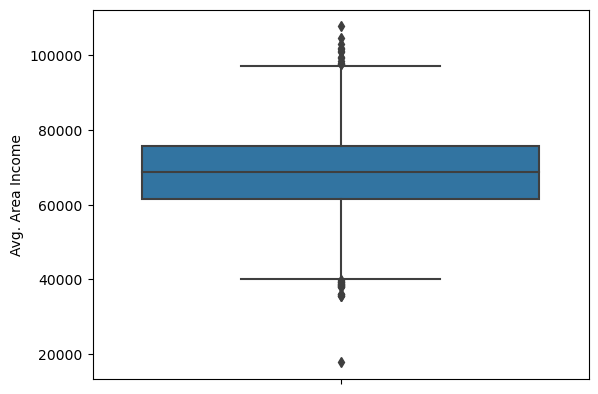

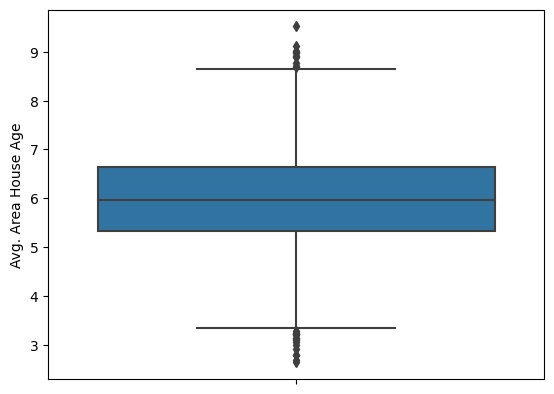

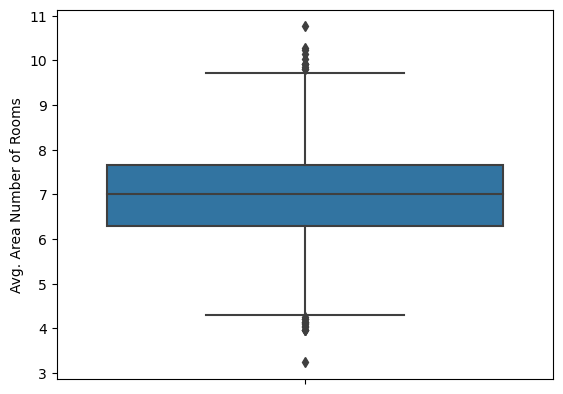

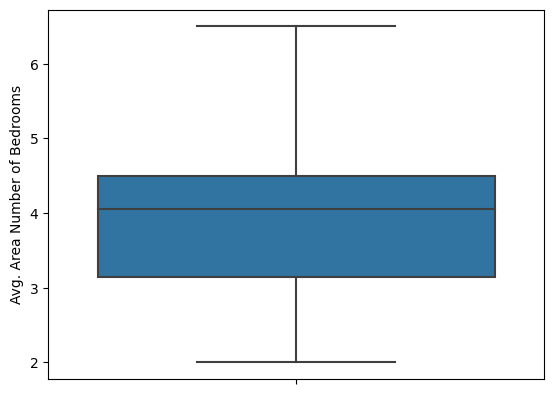

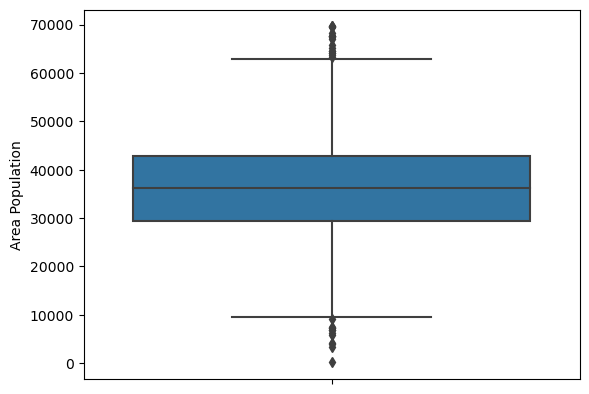

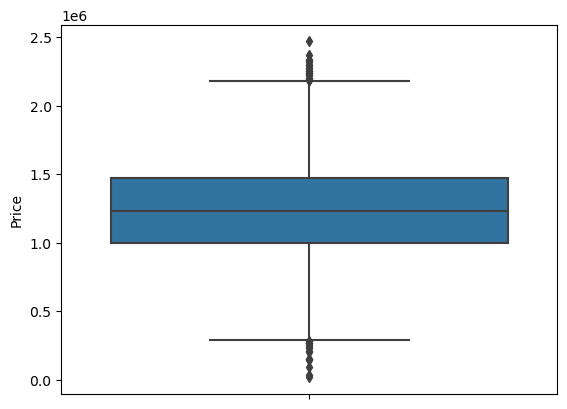

In [10]:
def boxplot(cols):
    sns.boxplot(y=df[cols])
    plt.show()
for i in list(df.columns):
    boxplot(i)

In [11]:
#we remove outliers throug iqr approach
#lower fence and upper fence
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr = q3-q1
upper_fence = q3+1.5*iqr
lower_fence = q1-1.5*iqr
print('upper fence \n', upper_fence)
print('lower fence \n', lower_fence)

upper fence 
 Avg. Area Income                9.723750e+04
Avg. Area House Age             8.643597e+00
Avg. Area Number of Rooms       9.715803e+00
Avg. Area Number of Bedrooms    6.515000e+00
Area Population                 6.304733e+04
Price                           2.181660e+06
dtype: float64
lower fence 
 Avg. Area Income                 40026.397978
Avg. Area House Age                  3.329495
Avg. Area Number of Rooms            4.249318
Avg. Area Number of Bedrooms         1.115000
Area Population                   9217.885595
Price                           287127.530937
dtype: float64


In [12]:
#trimming approach
df1=df[~((df<=lower_fence))|(df>upper_fence).any(axis=1)]

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              4981 non-null   float64
 1   Avg. Area House Age           4985 non-null   float64
 2   Avg. Area Number of Rooms     4987 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               4988 non-null   float64
 5   Price                         4986 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


In [14]:
#generally trimming approach shudnt be used
#we use capping appraoch

In [15]:
#capping appraoch

In [16]:
df2=np.where(df<=lower_fence, lower_fence,np.where(df>=upper_fence, upper_fence, df))
#when we run this, it will be availabe in numpy format,i.em arrays

In [17]:
df2


array([[7.95454586e+04, 5.68286132e+00, 7.00918814e+00, 4.09000000e+00,
        2.30868005e+04, 1.05903356e+06],
       [7.92486424e+04, 6.00289981e+00, 6.73082102e+00, 3.09000000e+00,
        4.01730722e+04, 1.50589092e+06],
       [6.12870672e+04, 5.86588984e+00, 8.51272743e+00, 5.13000000e+00,
        3.68821594e+04, 1.05898799e+06],
       ...,
       [6.33906869e+04, 7.25059062e+00, 4.80508098e+00, 2.13000000e+00,
        3.32661455e+04, 1.03072958e+06],
       [6.80013312e+04, 5.53438842e+00, 7.13014386e+00, 5.44000000e+00,
        4.26256202e+04, 1.19865687e+06],
       [6.55105818e+04, 5.99230531e+00, 6.79233610e+00, 4.07000000e+00,
        4.65012838e+04, 1.29895048e+06]])

In [18]:
df2=pd.DataFrame(df2,columns=df.columns)

In [19]:
df2.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


In [20]:
df2.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68585.636250,5.977490,6.987624,3.981330,36159.070769,1.232028e+06
std,10592.080045,0.986995,1.001847,1.234137,9862.221143,3.512598e+05
min,40026.397978,3.329495,4.249318,2.000000,9217.885595,2.871275e+05
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,97237.503077,8.643597,9.715803,6.500000,63047.333875,2.181660e+06


In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


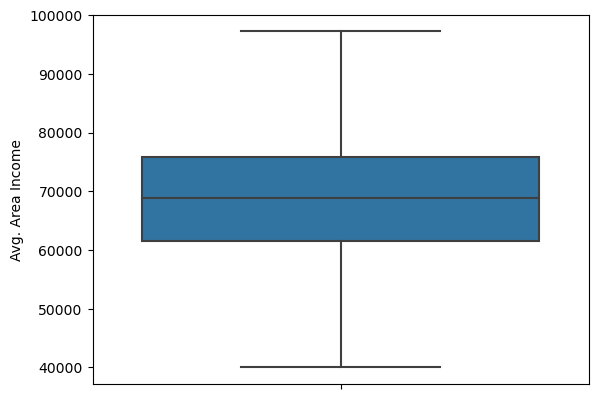

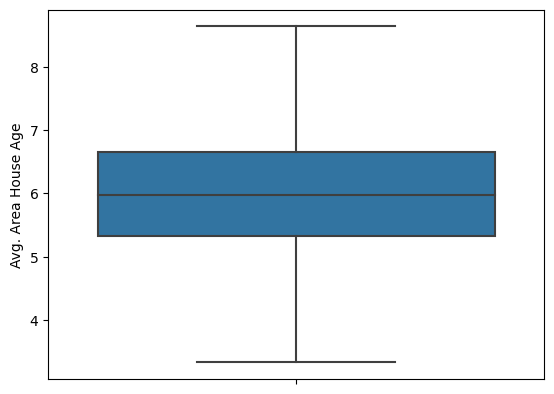

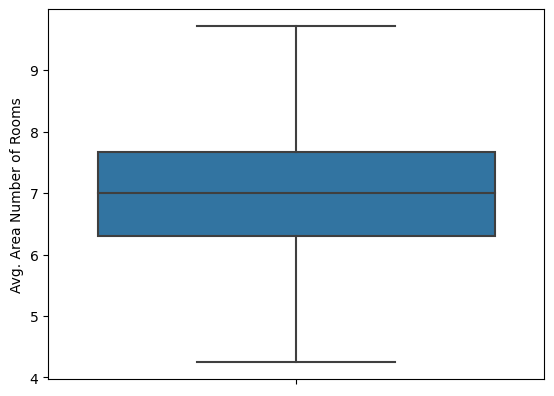

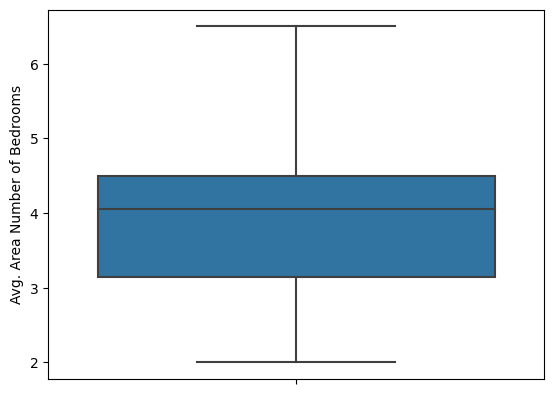

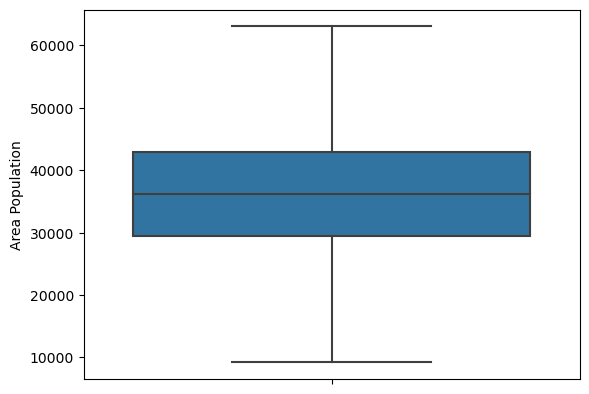

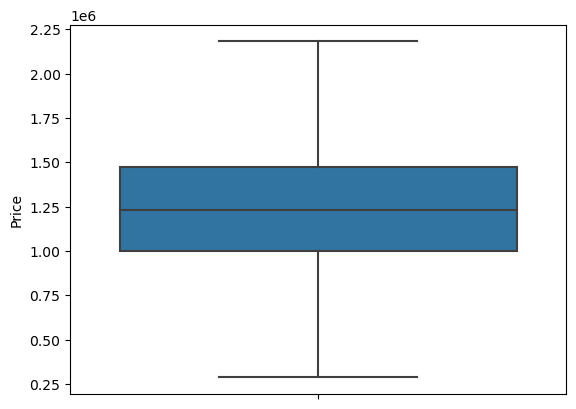

In [22]:
def boxplot(cols):
    sns.boxplot(y=df2[cols])
    plt.show()
for i in list(df2.columns):
    boxplot(i)

In [23]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


In [24]:
#now we can see there are no outliers

In [25]:
df2.shape


(5000, 6)

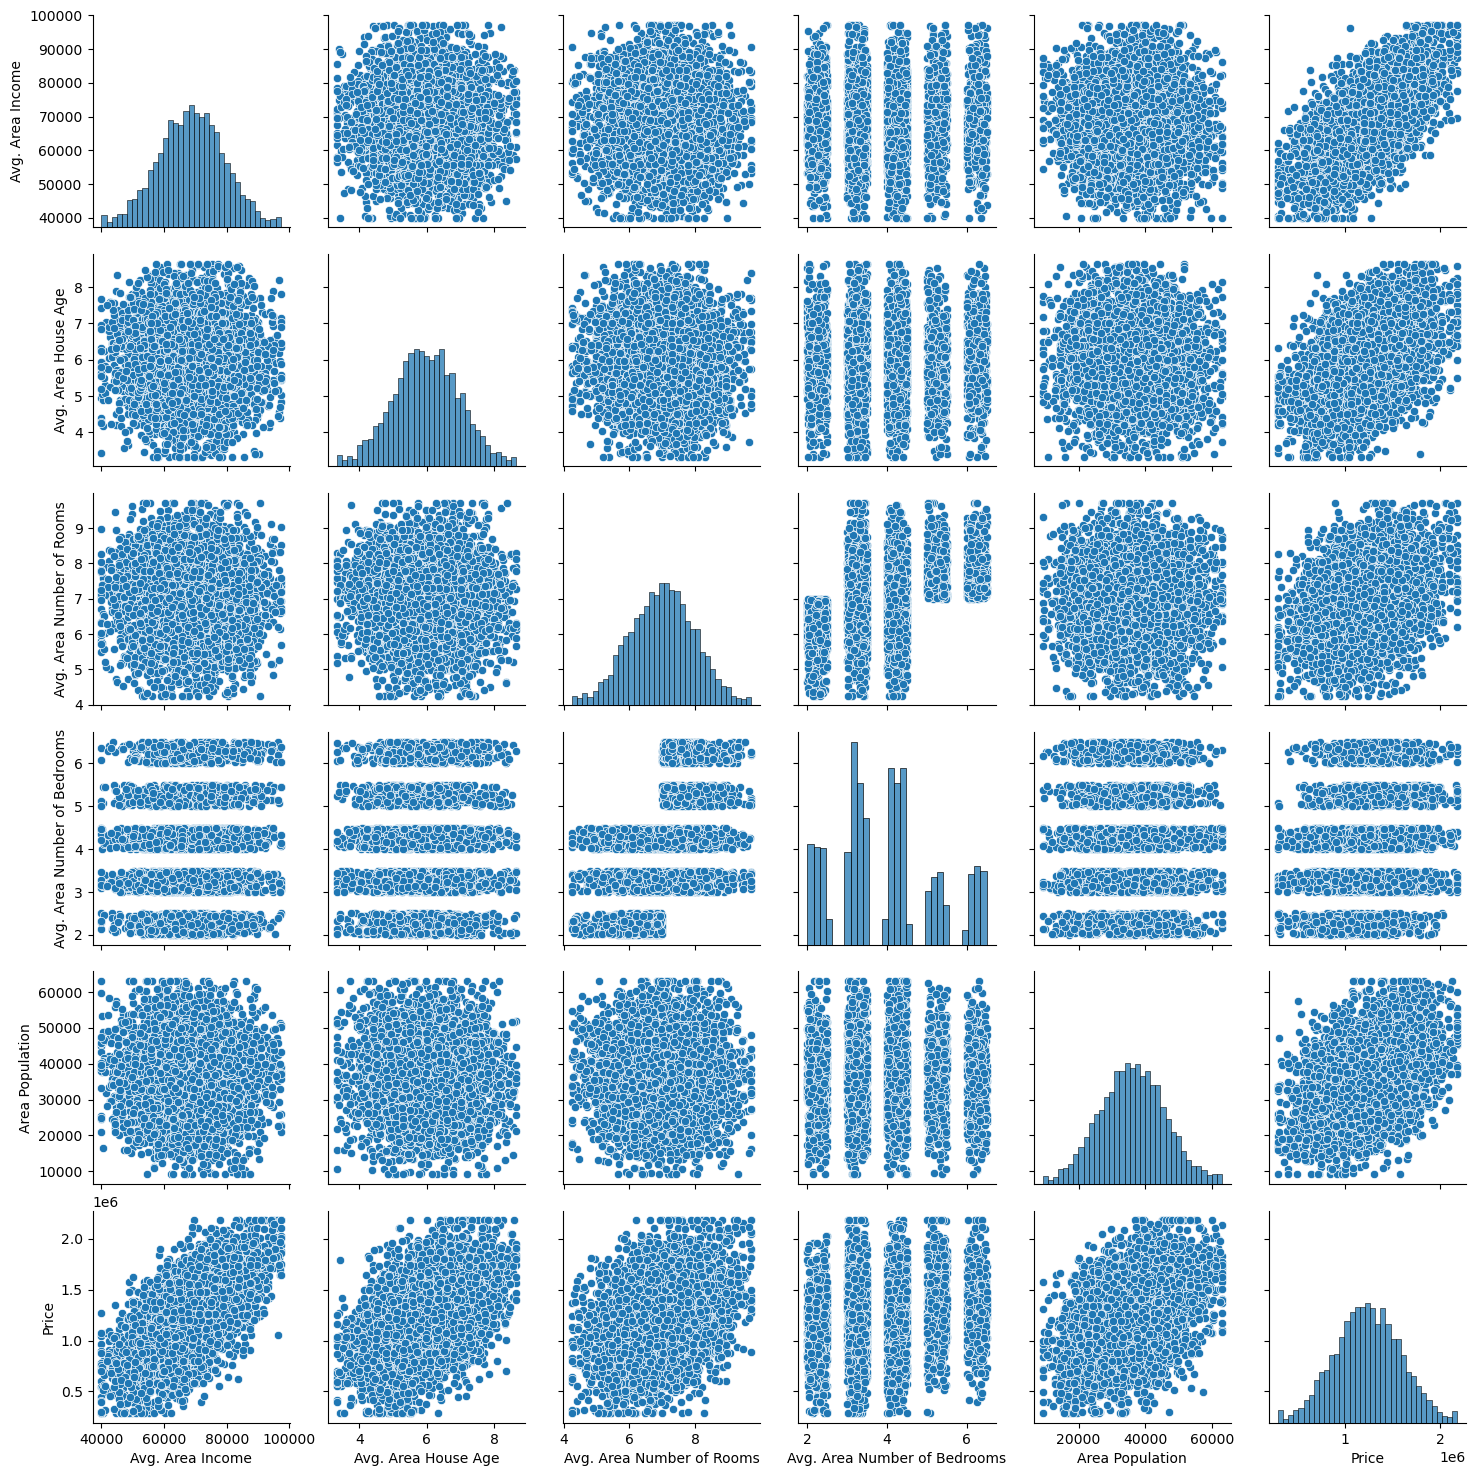

In [26]:
sns.pairplot(df2)

In [27]:
#here we can see prce is having linear relationship with avg area income

In [28]:
corr=df2.corr() #default pearson
corr

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002800,-0.011739,0.019531,-0.014348,0.639078
Avg. Area House Age,-0.002800,1.000000,-0.009748,0.006645,-0.018191,0.452011
Avg. Area Number of Rooms,-0.011739,-0.009748,1.000000,0.463871,0.001400,0.335186
Avg. Area Number of Bedrooms,0.019531,0.006645,0.463871,1.000000,-0.022156,0.171096
Area Population,-0.014348,-0.018191,0.001400,-0.022156,1.000000,0.408916
Price,0.639078,0.452011,0.335186,0.171096,0.408916,1.000000


<AxesSubplot:>

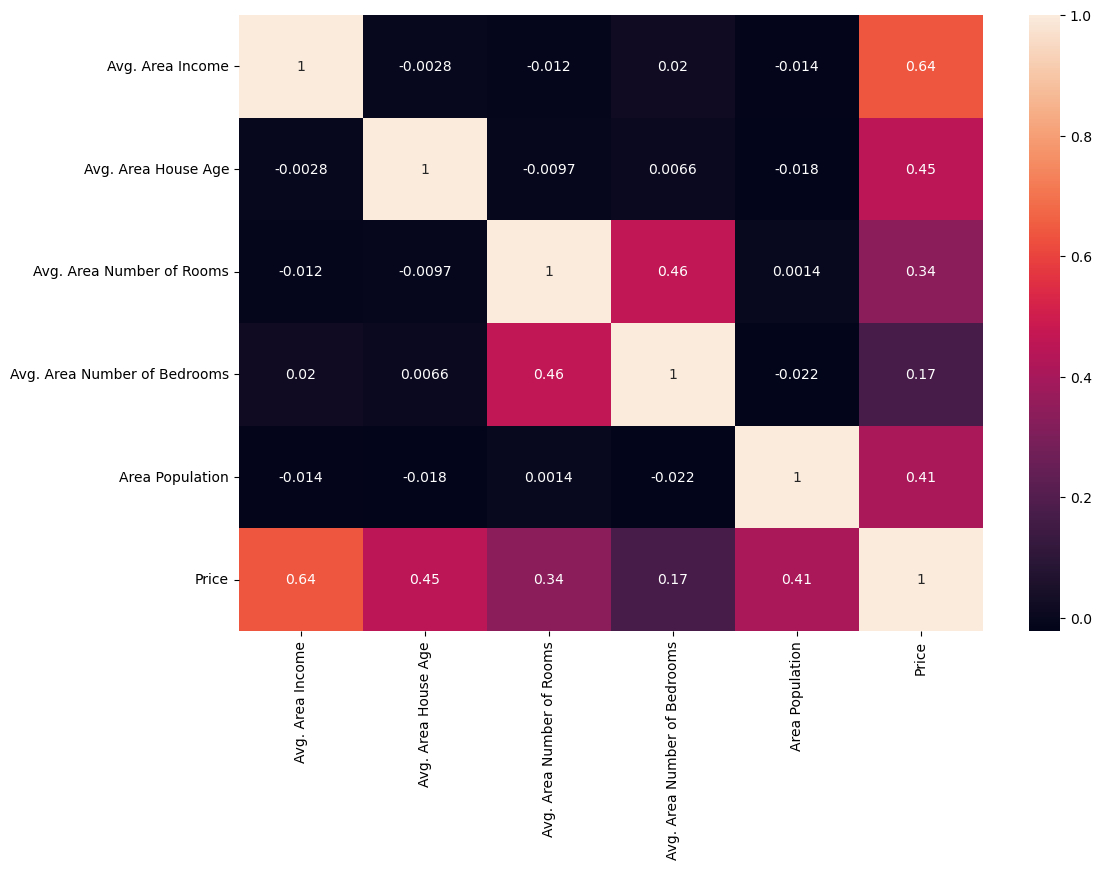

In [29]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True)

In [30]:
#if correlation coeffieccint is >0.9 we can drop

In [31]:
#splitting data into dependent and independent variables

In [32]:
x=df2.drop(['Price'], axis=1)
y=df2['Price']

<AxesSubplot:>

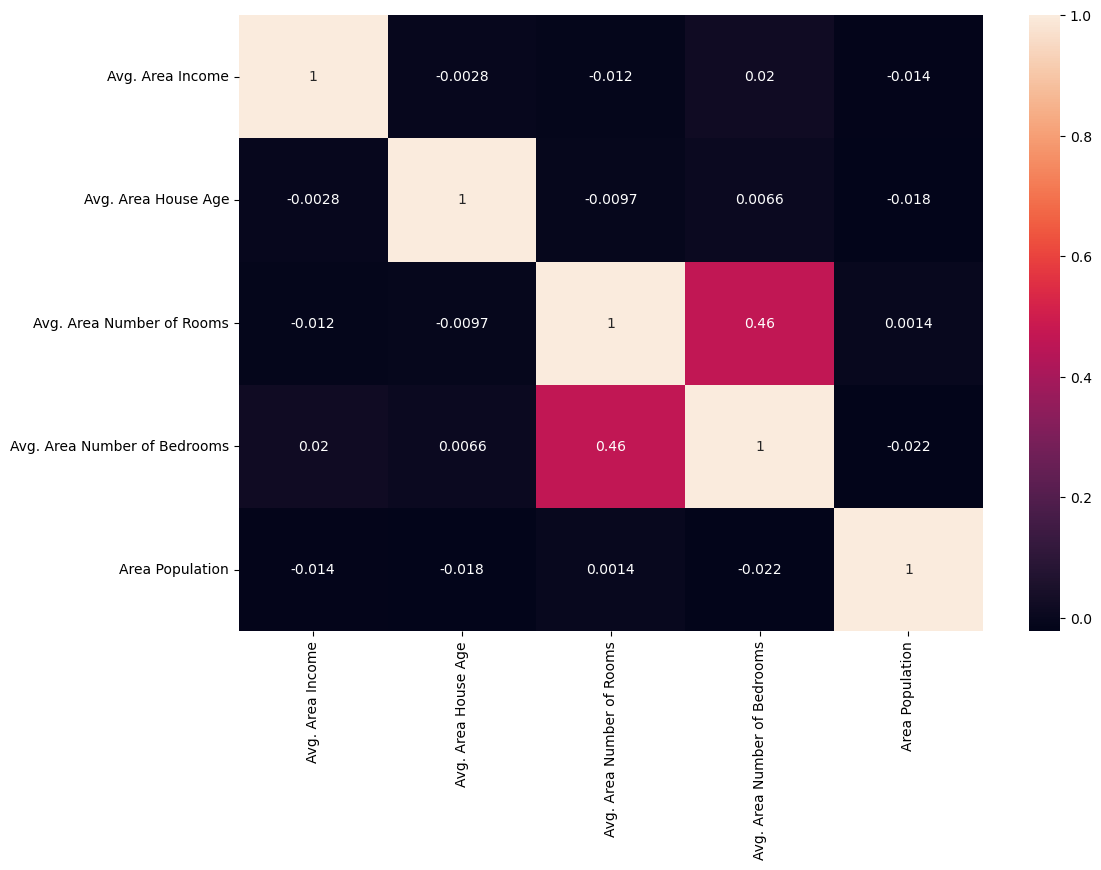

In [33]:
corr=x.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True)

In [34]:
#here we are droppig price, to see heat map because we dont need to check multi collinearity

In [35]:
x.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.45857,5.682861,7.009188,4.09,23086.80050
1,79248.64245,6.002900,6.730821,3.09,40173.07217
2,61287.06718,5.865890,8.512727,5.13,36882.15940
3,63345.24005,7.188236,5.586729,3.26,34310.24283
4,59982.19723,5.040555,7.839388,4.23,26354.10947


In [36]:
#here we can see avg income has large value, Avg. Area House Age is less value, so it gives importance to few clumns

In [37]:
#feature scaling - helps to bring all values in one lvel

In [38]:
# sccaling approach - here we exclude dependent varaible

In [39]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [40]:
#frequently used StandardScaler(this uses z-score approach) for linear regrssn

In [41]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [42]:
x_scaled

array([[ 1.0348221 , -0.29854096,  0.0215269 ,  0.08806222, -1.32562204],
       [ 1.00679683,  0.02574693, -0.25635494, -0.72230146,  0.40704855],
       [-0.68912801, -0.11308223,  1.52244502,  0.93084045,  0.07332638],
       ...,
       [-0.49050507,  1.29000432, -2.17873777, -1.50025059, -0.29336339],
       [-0.05516985, -0.44898526,  0.14227176,  1.18205319,  0.65575453],
       [-0.29034543,  0.01501175, -0.19494709,  0.07185495,  1.04877464]])

In [43]:
x_scaled= pd.DataFrame(x_scaled, columns=x.columns)

In [44]:
x_scaled.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,1.034822,-0.298541,0.021527,0.088062,-1.325622
1,1.006797,0.025747,-0.256355,-0.722301,0.407049
2,-0.689128,-0.113082,1.522445,0.930840,0.073326
3,-0.494796,1.226822,-1.398453,-0.584540,-0.187484
4,-0.812333,-0.949376,0.850279,0.201513,-0.994293


In [45]:
#now we can see all columns are scaled

# model building process

In [46]:
# sklearn package - linear regression
# statsmodel - OLS - Ordinary least square method

In [47]:
#in sklearn model, by default it will take intercept(c) value,
#but in OLS model we have to add the constant 

In [48]:
#ols model

In [49]:
x1=x_scaled.copy()

In [50]:
#working ols - adding constant is required

In [51]:
import statsmodels.api as sm #required for adding constant
x1=sm.add_constant(x1)
x1.head()

,const,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,1.0,1.034822,-0.298541,0.021527,0.088062,-1.325622
1,1.0,1.006797,0.025747,-0.256355,-0.722301,0.407049
2,1.0,-0.689128,-0.113082,1.522445,0.930840,0.073326
3,1.0,-0.494796,1.226822,-1.398453,-0.584540,-0.187484
4,1.0,-0.812333,-0.949376,0.850279,0.201513,-0.994293


In [52]:
#all rows const is 1, as it shudnt give imprtance to any row

In [53]:
# ols model building

In [54]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [55]:
OLS_model=smf.OLS(y,x1)

In [56]:
OLS_result = OLS_model.fit()

In [57]:
OLS_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                 1.096e+04
Date:                Tue, 28 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:21:21   Log-Likelihood:                -64734.
No. Observations:                5000   AIC:                         1.295e+05
Df Residuals:                    4994   BIC:                         1.295e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         1.232e+06   1436.427    857.703      0.000    1.23e+06    1.23e+06
Avg. Area Income              2.285e+05   1437.240    158.952      0.000    2.26e+05    2.31e+05
Avg. Area House Age           1.633e+05   1436.848    113.644      0.000     1.6e+05    1.66e+05
Avg. Area Number of Rooms      1.21e+05   1622.175     74.579      0.000    1.18e+05    1.24e+05
Avg. Area Number of Bedrooms  1744.4540   1622.715      1.075      0.282   -1436.780    4925.688
Area Population               1.497e+05   1437.269    104.183      0.000    1.47e+05    1.53e+05
==============================================================================
Omnibus:                        5.111   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.078   Jarque-Bera (JB):                4.598
Skew:                           0.015   Prob(JB):                        0.100
Kurtosis:                       2.855   Cond. No.                         1.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#while using vif and ols, we have to add constants

In [64]:
vif = pd.DataFrame()

In [ ]:
vif['vif value'] = [varaince]

In [58]:
#r-sqaured and adjusted-r-squared is accuracy
#r-sqaured  - take all columns
#adjusted-r-squared - takes columns only that are significant
#adjusted-r-squared will always be equal or less than r-squared
#even if insignificant column is added, adjusted-r-squared will either slightly decrease/not change,
#but r-square can imcrease

In [59]:
#Durbin-Watson  - it speaks abot correlation btn independent variables
#range 0 to 4
#around 2(1.5-2.5) - no correlation -     no major change 
# 0  to2 - postitve correlation - if yesterday market price decreased, today also it will decrease,
            #it will move in same direction
#2 to 4 - negative correlation - if yesterday market price decreased, today it will increase,
            #it will move in opposite direction

In [60]:
#here we see p value for Avg. Area Number of Bedrooms is 0.2
# AS it is greater than 0.5, we cannot reject null hypothesis,
# means that particular column has no change, and can consider insignificant


In [61]:
#linear regresion
#sk learn

In [65]:
from sklearn.model_selection import train_test_split

In [ ]:
#here below x is independent variables, y is ouput/target
#here for eg - if we have 1000 data, we use 800 data (80 %) for training along with output
# and other 200 data we use for testing and check accurcy

In [67]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y,train_size=0.75,random_state=100)

In [66]:
#here train size is 75 %, we can either give test_size=25 also
# by defualt train size is 80%, test is 20%
#x_scaled - we are passing scaled data

In [68]:
x_train.shape

(3750, 5)

In [ ]:
#3750 rows - 75% of observations

In [69]:
x_test.shape

(1250, 5)

In [70]:
y_train.shape

(3750,)

In [71]:
y_test.shape

(1250,)

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [ ]:
#here above we are asking machine to train through training data throug fit method

In [75]:
y_predict = LR.predict(x_test)

In [76]:
y_predict

array([ 813889.15749025, 1562524.53568859, 1323059.95840724, ...,
        972269.13813552, 1057937.86383455, 1355997.78385991])

In [ ]:
#let us comapare y_predict with y_test(actual answr)

In [77]:
y_test

789     8.008091e+05
2507    1.620949e+06
2376    1.219637e+06
1378    1.172133e+06
598     8.644838e+05
            ...     
2987    1.344869e+06
3016    1.468460e+06
2167    8.927181e+05
1079    1.085113e+06
255     1.360624e+06
Name: Price, Length: 1250, dtype: float64

In [ ]:
#here we can see y_predict and y_test are almost close

In [ ]:
#score fn for accuacy calculation - part of moddel evalauation

In [79]:
test_score= LR.score(x_test, y_test)

In [80]:
test_score

0.9177617722706075

In [81]:
train_score= LR.score(x_train, y_train)

In [83]:
train_score


0.9159867603131938

In [ ]:
#train score is how accuarately our model learned the data
#test score is how accuarately our model gave the result

In [ ]:
#fidning slope, intercept

In [86]:
print(LR.intercept_)

1232950.7814509992


In [87]:
print(LR.coef_)

[228036.48331866 164266.67503788 121077.36286074   1056.90307767
 150617.60368522]


In [ ]:
#create a dataframe y_test and y_predicted - assignemnt

In [ ]:
# Regression model evalaution

In [89]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score


In [90]:
y_predict_train = LR.predict(x_train)

In [ ]:
#here above we have see how x_train has been trained with model
#here we comapre y_predict_train with y_train

In [91]:
y_predict_test = LR.predict(x_test)

In [ ]:
#here we comapre y_predict_test with y_test

In [92]:
print("train accuracy", r2_score(y_train, y_predict_train))

train accuracy 0.9159867603131938


In [93]:
print("test accuracy", r2_score(y_test, y_predict_test))

train accuracy 0.9177617722706075


In [94]:
print("mean square error train", mse(y_train, y_predict_train))

mean square error 10296522825.113525


In [95]:
print("mean square error", mse(y_test, y_predict_test))

mean square error 10340103923.609587


In [96]:
print("mean absolute error train", mae(y_train, y_predict_train))

mean absolute error train 81774.13889448089


In [97]:
print("mean absolute error test", mae(y_test, y_predict_test))

mean absolute error test 81523.49805432389


In [ ]:
#how do we decide best fit line
#best fit line is the prediction done by the model
#suppose for exp vs salalry, 
# best fit by model gives  - for exp 10 , predicted(on best fit) it is 90k
# true salary - for exp 10 , it is 79k
#error/residual - -11k

# best fit by model gives  - for exp 12 , predicted(on best fit) it is 100k
# true salary - for exp 10 , it is 85k
#error - -15k

#so we sum up all errors for all lines,and see minimum sum of error and that will be the best fit line
#basically we find error = diff(true value - prediction)


In [ ]:
#maths behind regression(finding best fit line)

# Gradient Descent

In [ ]:
#LR is used to find best fit line
#this is used to make predictions

In [ ]:
#statistics way to find best fit

In [ ]:
prediction fn , y = w*x + b

In [ ]:
#if we have 3 lines, what gradient descent does
#it takes a random vlaue, m and c
#for evry input, it cross-checks error

#where we reach by adjustng sum of squared error is smallest
#here it will keep changing values of m & c, and it will shift to new line

In [ ]:
#cost function - the sum of squared error
#the goal of Grdient Desccent is to reduce cost function, in multiple iterations

In [ ]:
#cost fn f(y) is like x^2 - parabola
#but cost fn is dependent on w and b
#we wil find derivative of cost fn w.r.t slope and constant

In [ ]:
#Learninng step will be reducing when it approaches minimum, as it shudnt miss minimum
# the rate of change will be very less, so that it doesnt miss best fit line
#learning rate -  in backgrounf machine will choose to learn slowly, everytime it will update value of m & c 
    #i.e, how big the steps wud be in each iteration
    #it shud ideally have less learnig rate